In [1]:
import SVMClassifier as svm
import PCA as pca
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Kernel
from mpl_toolkits.mplot3d import Axes3D

In [2]:
filepath = '../challenge-dataset/'

In [3]:
inputs = np.array([
                    [-1,1],
                    [1/2,1],
                    [1/2,2],
                    [-2,2],
                    [-1,5/2],
                    [1/2,-1],
                    [1/2,-2],
                    [-1/2, 3/2],
                    [2,1/2],
                    [5/2,3/2]   
])
labels = np.array([1,1,1,1,1,-1,-1,-1,-1,-1])

In [4]:
Xtr0_mat100 = pd.read_csv(filepath + 'Xtr0_mat100.csv', delimiter=' ', header = None)
Ytr0 = pd.read_csv(filepath + 'Ytr0.csv', delimiter=',', sep='\n', header = 0)

Xte0_mat100 = pd.read_csv(filepath + 'Xte0_mat100.csv', delimiter=' ', header = None)

In [5]:
def bound_normalisation(x):
    if x == 0:
        return -1
    else:
        return x

In [6]:
Ytr0['Bound'] = Ytr0['Bound'].map(bound_normalisation)

In [7]:
print(Xtr0_mat100.values.shape)

(2000, 100)


In [8]:
inputs_tr = Xtr0_mat100.values[:1900]
labels_tr = Ytr0.values[:,1][:1900]

inputs_te = Xtr0_mat100.values[1900:]
labels_te = Ytr0.values[:,1][1900:]

In [15]:
lam = 1
bandwidth = 1
def f(x,y,bandwidth):
    return np.exp(-(np.linalg.norm(x-y)/bandwidth)**2)

kernel = Kernel.Kernel(lambda x,y :f(x,y,bandwidth))



<function <lambda> at 0x7f20fe4e7158>
coucou


In [16]:
pca_agent = pca.PCA(kernel=kernel)
projections = pca_agent.perform_PCA(inputs_tr, dim_num = 3)

graham_matrix [[1.000001   0.9750334  0.9805786  ... 0.97618606 0.9787267  0.98220188]
 [0.9750334  1.000001   0.96860362 ... 0.9644926  0.97757104 0.97342196]
 [0.9805786  0.96860362 1.000001   ... 0.98173781 0.97296204 0.97942075]
 ...
 [0.97618606 0.9644926  0.98173781 ... 1.000001   0.97411225 0.97803314]
 [0.9787267  0.97757104 0.97296204 ... 0.97411225 1.000001   0.97342196]
 [0.98220188 0.97342196 0.97942075 ... 0.97803314 0.97342196 1.000001  ]]
eigen_values [5.7180274  4.28439443 2.68043687]
eigen_vectors [[-2.29415734e-02  3.22047423e-12  1.89527213e-13 ...  1.09738884e-02
   1.12408923e-02 -7.71523308e-03]
 [-2.29415735e-02  7.04344742e-12 -2.68579603e-12 ...  1.34223202e-02
  -2.03092885e-02 -4.01966529e-02]
 [-2.29415734e-02  5.42129275e-12 -2.07485591e-12 ...  3.00060299e-02
  -6.53290606e-03  9.66306190e-03]]
sorted eigen vectors (3, 1900)
[[-9.59400816e-03  1.34678017e-12  7.92589768e-14 ...  4.58920465e-03
   4.70086384e-03 -3.22645740e-03]
 [-1.10835396e-02  3.4028323

<IPython.core.display.Javascript object>


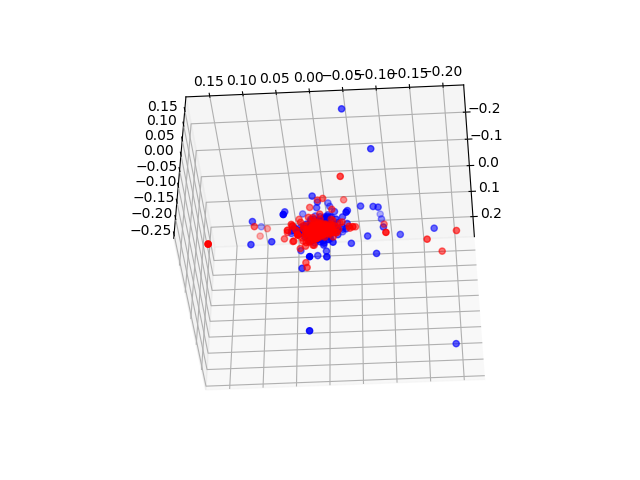

In [14]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
label_1 = projections[labels_tr==1]
label_2 = projections[labels_tr==-1]
ax.scatter(label_1[:,0], label_1[:,1], label_1[:,2], color='red')
ax.scatter(label_2[:,0], label_2[:,1], label_2[:,2] ,color= 'blue')

